In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json

In [7]:
# enter twitter credentials
access_token = '1294388428575047689-WvlMpJUChRZjcuninImIw7eF7yu38a'
access_token_secret = 'iDWhvgwhj8dVCsp7KZjxd2JBSaJ8VHFMZExx3xUASFjR7'
consumer_key = 'iPFS9i2gSLlpsE62ok12MtVgR'
consumer_secret = 'JRdOONARCiJ3Y232GPCxNQuo43JAVRktrnY1mh03OljuiLDhnR'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [9]:
post = api.user_timeline(screen_name = 'BillGates',count = 100, lan = 'en',tweet_mode = 'extended')

In [27]:
tweets = []
for i in range(100):
    tweets.append(post[i].full_text)

In [28]:
tweets

['Thank you @BarackObama for the kind words. Your leadership at the 2015 Paris climate conference helped prove that global cooperation on climate is possible and gives me hope that we can reach our goal of zero emissions. https://t.co/990iHWgQqx',
 '@EDFaction @Breakthrough Thank you for your partnership, @EDFAction, and for sharing what all of us can do to avoid a climate disaster.',
 'RT @wkamaubell: Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…',
 'Moving to a green economy is the biggest challenge the world has ever faced. I’m optimistic we can do it, but need to make sure it benefits everyone—including those workers and communities who depend on the fossil fuels that we need to get rid of. https://t.co/UsjyfdOuQi',
 'We can’t avoid a climate disaster without corporate leaders making courageous decisions now. I hope to work with @VWGroup on building the markets for the clean technologies the world ne

In [29]:
data = pd.DataFrame(tweets,columns= ['tweet'])

In [33]:
data['tweet'].iloc[0]

'Thank you @BarackObama for the kind words. Your leadership at the 2015 Paris climate conference helped prove that global cooperation on climate is possible and gives me hope that we can reach our goal of zero emissions. https://t.co/990iHWgQqx'

In [34]:
# remove mentions(@), remove url, remove punctuations, remove stop words, remove word RT, remove hashtags
import re

In [ ]:
for i in range(100):
    try:
        url = re.search(r'https://([A-Z]+|[a-z]+|[0-9]+)(\.co)*/([A-Z]+|[a-z]+|[0-9]+)+(\.com)*',data['tweet'].iloc[i]).group()
        data['tweet'].iloc[i] = data['tweet'].iloc[i].replace(url,"")
    except:
        print(i)

In [105]:
tweet_1 = []
for i in range(100):
    tweet_1.append(data['tweet'].iloc[i])

In [127]:
# removing Rt
tweet_2 = []
for items in tweet_1:
    tweet_2.append(items.replace('RT',""))

In [128]:
tweet_2

['Thank you @BarackObama for the kind words. Your leadership at the 2015 Paris climate conference helped prove that global cooperation on climate is possible and gives me hope that we can reach our goal of zero emissions. ',
 '@EDFaction @Breakthrough Thank you for your partnership, @EDFAction, and for sharing what all of us can do to avoid a climate disaster.',
 ' @wkamaubell: Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…',
 'Moving to a green economy is the biggest challenge the world has ever faced. I’m optimistic we can do it, but need to make sure it benefits everyone—including those workers and communities who depend on the fossil fuels that we need to get rid of. ',
 'We can’t avoid a climate disaster without corporate leaders making courageous decisions now. I hope to work with @VWGroup on building the markets for the clean technologies the world needs. Thank you for the kind words, Herbert. ',
 

In [153]:
regex = r"@([A-Z]+|[a-z]+|[0-9]+)+(_)*([A-Z]+|[a-z]+|[0-9]+)+"

In [195]:
#Removing @
tweet_3 = []
for items in tweet_2:
    x1 = re.finditer(regex,items)
    for pattern in x1:
        items = items.replace(pattern.group(),"")
    tweet_3.append(items)
    #tweet_3.append(item)    

In [197]:
tweet_3

['Thank you  for the kind words. Your leadership at the 2015 Paris climate conference helped prove that global cooperation on climate is possible and gives me hope that we can reach our goal of zero emissions. ',
 '  Thank you for your partnership, , and for sharing what all of us can do to avoid a climate disaster.',
 ' : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…',
 'Moving to a green economy is the biggest challenge the world has ever faced. I’m optimistic we can do it, but need to make sure it benefits everyone—including those workers and communities who depend on the fossil fuels that we need to get rid of. ',
 'We can’t avoid a climate disaster without corporate leaders making courageous decisions now. I hope to work with  on building the markets for the clean technologies the world needs. Thank you for the kind words, Herbert. ',
 'Delivering vaccines to those who need them most, no matter wher

In [198]:
# removing hashtags
regex_1 = r'#([A-Z]+|[a-z]+|[0-9]+)+'

In [201]:
tweet_4 = []
for items in tweet_3:
    x1 = re.finditer(regex_1,items)
    for pattern in x1:
        items = items.replace(pattern.group(),"")
    tweet_4.append(items)
    #tweet_3.append(item)    

In [202]:
tweet_4

['Thank you  for the kind words. Your leadership at the 2015 Paris climate conference helped prove that global cooperation on climate is possible and gives me hope that we can reach our goal of zero emissions. ',
 '  Thank you for your partnership, , and for sharing what all of us can do to avoid a climate disaster.',
 ' : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…',
 'Moving to a green economy is the biggest challenge the world has ever faced. I’m optimistic we can do it, but need to make sure it benefits everyone—including those workers and communities who depend on the fossil fuels that we need to get rid of. ',
 'We can’t avoid a climate disaster without corporate leaders making courageous decisions now. I hope to work with  on building the markets for the clean technologies the world needs. Thank you for the kind words, Herbert. ',
 'Delivering vaccines to those who need them most, no matter wher

In [270]:
tweet_5 = []
for i in range(len(tweet_4)):
    text = tweet_4[i]
    clean = re.sub(r"[,-.;:@#?!&$%)(*+']+\ *", " ", text)
    clean_1 = re.sub(r"[0-9]"," ",clean)
    clean_1 = clean_1.lower()
    tweet_5.append(clean_1)

In [271]:
tweet_5

['thank you  for the kind words your leadership at the      paris climate conference helped prove that global cooperation on climate is possible and gives me hope that we can reach our goal of zero emissions ',
 '  thank you for your partnership  and for sharing what all of us can do to avoid a climate disaster ',
 '  black folks have questions about the covid    vaccine i sat down w/ black healthcare workers  amp they answered my questions …',
 'moving to a green economy is the biggest challenge the world has ever faced i’m optimistic we can do it but need to make sure it benefits everyone—including those workers and communities who depend on the fossil fuels that we need to get rid of ',
 'we can’t avoid a climate disaster without corporate leaders making courageous decisions now i hope to work with  on building the markets for the clean technologies the world needs thank you for the kind words herbert ',
 'delivering vaccines to those who need them most no matter where they live or 

In [272]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [273]:
from nltk.corpus import stopwords

In [274]:
words= stopwords.words('english')

In [275]:
tokens = []
for item in tweet_5:
    x = word_tokenize(item)
    tokens.append(x)

In [276]:
tokens

[['thank',
  'you',
  'for',
  'the',
  'kind',
  'words',
  'your',
  'leadership',
  'at',
  'the',
  'paris',
  'climate',
  'conference',
  'helped',
  'prove',
  'that',
  'global',
  'cooperation',
  'on',
  'climate',
  'is',
  'possible',
  'and',
  'gives',
  'me',
  'hope',
  'that',
  'we',
  'can',
  'reach',
  'our',
  'goal',
  'of',
  'zero',
  'emissions'],
 ['thank',
  'you',
  'for',
  'your',
  'partnership',
  'and',
  'for',
  'sharing',
  'what',
  'all',
  'of',
  'us',
  'can',
  'do',
  'to',
  'avoid',
  'a',
  'climate',
  'disaster'],
 ['black',
  'folks',
  'have',
  'questions',
  'about',
  'the',
  'covid',
  'vaccine',
  'i',
  'sat',
  'down',
  'w/',
  'black',
  'healthcare',
  'workers',
  'amp',
  'they',
  'answered',
  'my',
  'questions',
  '…'],
 ['moving',
  'to',
  'a',
  'green',
  'economy',
  'is',
  'the',
  'biggest',
  'challenge',
  'the',
  'world',
  'has',
  'ever',
  'faced',
  'i',
  '’',
  'm',
  'optimistic',
  'we',
  'can',
  

In [278]:
tweet_6 = []
for token in tokens:
    lis = []
    for word in token:
        if word not in(words):
            lis.append(word) 
    tweet_6.append(lis)    

In [279]:
tweet_6

[['thank',
  'kind',
  'words',
  'leadership',
  'paris',
  'climate',
  'conference',
  'helped',
  'prove',
  'global',
  'cooperation',
  'climate',
  'possible',
  'gives',
  'hope',
  'reach',
  'goal',
  'zero',
  'emissions'],
 ['thank', 'partnership', 'sharing', 'us', 'avoid', 'climate', 'disaster'],
 ['black',
  'folks',
  'questions',
  'covid',
  'vaccine',
  'sat',
  'w/',
  'black',
  'healthcare',
  'workers',
  'amp',
  'answered',
  'questions',
  '…'],
 ['moving',
  'green',
  'economy',
  'biggest',
  'challenge',
  'world',
  'ever',
  'faced',
  '’',
  'optimistic',
  'need',
  'make',
  'sure',
  'benefits',
  'everyone—including',
  'workers',
  'communities',
  'depend',
  'fossil',
  'fuels',
  'need',
  'get',
  'rid'],
 ['’',
  'avoid',
  'climate',
  'disaster',
  'without',
  'corporate',
  'leaders',
  'making',
  'courageous',
  'decisions',
  'hope',
  'work',
  'building',
  'markets',
  'clean',
  'technologies',
  'world',
  'needs',
  'thank',
  'kin

In [281]:
tokens

[['thank',
  'you',
  'for',
  'the',
  'kind',
  'words',
  'your',
  'leadership',
  'at',
  'the',
  'paris',
  'climate',
  'conference',
  'helped',
  'prove',
  'that',
  'global',
  'cooperation',
  'on',
  'climate',
  'is',
  'possible',
  'and',
  'gives',
  'me',
  'hope',
  'that',
  'we',
  'can',
  'reach',
  'our',
  'goal',
  'of',
  'zero',
  'emissions'],
 ['thank',
  'you',
  'for',
  'your',
  'partnership',
  'and',
  'for',
  'sharing',
  'what',
  'all',
  'of',
  'us',
  'can',
  'do',
  'to',
  'avoid',
  'a',
  'climate',
  'disaster'],
 ['black',
  'folks',
  'have',
  'questions',
  'about',
  'the',
  'covid',
  'vaccine',
  'i',
  'sat',
  'down',
  'w/',
  'black',
  'healthcare',
  'workers',
  'amp',
  'they',
  'answered',
  'my',
  'questions',
  '…'],
 ['moving',
  'to',
  'a',
  'green',
  'economy',
  'is',
  'the',
  'biggest',
  'challenge',
  'the',
  'world',
  'has',
  'ever',
  'faced',
  'i',
  '’',
  'm',
  'optimistic',
  'we',
  'can',
  

In [288]:
tweet_7 = []
for token in tweet_6:
    sentence = " ".join(token)
    tweet_7.append(sentence)
    
        
    

In [293]:
data['cleaned_tweet'] = ''

In [296]:
for i in range(100):
    data['cleaned_tweet'].iloc[i] = tweet_7[i]

In [299]:
data['Subjectivity'] = ""
data['Polarity'] = ""

In [300]:
data

,tweet,cleaned_tweet,Subjectivity,Polarity
0,Thank you @BarackObama for the kind words. You...,thank kind words leadership paris climate conf...,,
1,@EDFaction @Breakthrough Thank you for your pa...,thank partnership sharing us avoid climate dis...,,
2,RT @wkamaubell: Black folks have questions abo...,black folks questions covid vaccine sat w/ bla...,,
3,Moving to a green economy is the biggest chall...,moving green economy biggest challenge world e...,,
4,We can’t avoid a climate disaster without corp...,’ avoid climate disaster without corporate lea...,,
...,...,...,...,...
95,Congratulations to President-Elect Biden and V...,congratulations president elect biden vice pre...,,
96,"Here in Washington, we always vote by mail. It...",washington always vote mail safe secure way sh...,,
97,@MohamedBinZayed The UAE is an essential partn...,uae essential partner stopping polio pakistan ...,,
98,"For decades, @Rotary has worked tirelessly to ...",decades worked tirelessly today health infrast...,,


In [301]:
from textblob import TextBlob

In [302]:
data['Subjectivity'] = data['cleaned_tweet'].apply(lambda x : TextBlob(x).subjectivity)

In [303]:
data['Polarity'] = data['cleaned_tweet'].apply(lambda x : TextBlob(x).polarity)

In [326]:
# Subjectivity and Polarity can directly be applied without removing cleaning it also.
# Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
# Subjectivity is also a float which lies in the range of [0,1]
#  0.75 subjectivity refers that mostly it is a public opinion and not a factual information.
# more towards 1 more it is someones opinion 

In [334]:
data['Sentiment'] = data['Polarity'].apply(lambda x : 'Positive' if(0 < x and x<=1) else('Negative' if (-1 <= x and x < 0) else 'Neutral' ) )

In [335]:
data

,tweet,cleaned_tweet,Subjectivity,Polarity,Sentiment
0,Thank you @BarackObama for the kind words. You...,thank kind words leadership paris climate conf...,0.633333,0.200000,Positive
1,@EDFaction @Breakthrough Thank you for your pa...,thank partnership sharing us avoid climate dis...,0.000000,0.000000,Neutral
2,RT @wkamaubell: Black folks have questions abo...,black folks questions covid vaccine sat w/ bla...,0.433333,-0.166667,Negative
3,Moving to a green economy is the biggest chall...,moving green economy biggest challenge world e...,0.594444,0.150000,Positive
4,We can’t avoid a climate disaster without corp...,’ avoid climate disaster without corporate lea...,0.533333,0.322222,Positive
...,...,...,...,...,...
95,Congratulations to President-Elect Biden and V...,congratulations president elect biden vice pre...,0.933333,0.700000,Positive
96,"Here in Washington, we always vote by mail. It...",washington always vote mail safe secure way sh...,0.408333,0.300000,Positive
97,@MohamedBinZayed The UAE is an essential partn...,uae essential partner stopping polio pakistan ...,0.300000,0.000000,Neutral
98,"For decades, @Rotary has worked tirelessly to ...",decades worked tirelessly today health infrast...,0.250000,0.250000,Positive


In [313]:
!pip install wordcloud

In [314]:
from wordcloud import WordCloud

In [319]:
concat_text = " ".join(tweets for tweets in data['cleaned_tweet'])

In [320]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(concat_text)

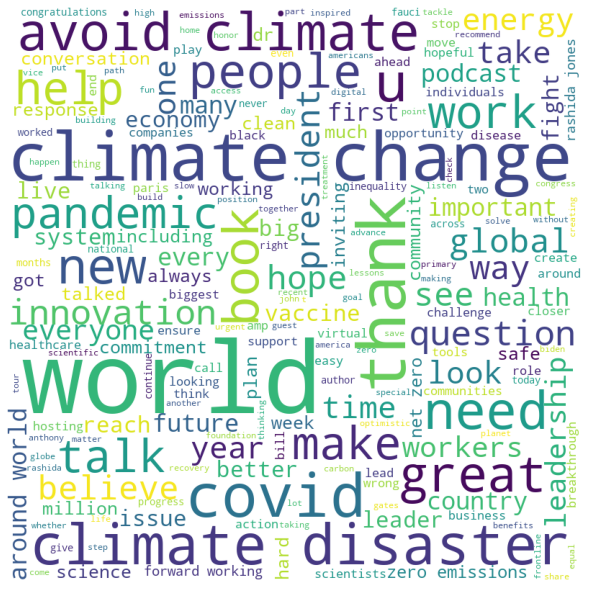

In [321]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
# wordcloud comes with axis as borders
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [336]:
data[data['Sentiment'] == 'Negative']

,tweet,cleaned_tweet,Subjectivity,Polarity,Sentiment
2,RT @wkamaubell: Black folks have questions abo...,black folks questions covid vaccine sat w/ bla...,0.433333,-0.166667,Negative
8,Recent extreme weather events are a stark remi...,recent extreme weather events stark reminder ’...,0.493750,-0.081250,Negative
25,"RT @TheAtlantic: The Weekly Planet: Lately, Bi...",weekly planet lately bill gates thinking calls...,0.570833,-0.295833,Negative
32,"RT @USATODAY: ""People who think a plan is easy...",`` people think plan easy wrong people think p...,0.736310,-0.161310,Negative
42,RT @codeorg: Only 3% of Black students learn c...,black students learn computer science high sch...,0.486667,-0.003333,Negative
45,"COVID-19 has cost lives, sickened millions, an...",covid cost lives sickened millions thrust glob...,0.500000,-0.500000,Negative
46,This has been a year unlike any other in our l...,year unlike lifetimes new annual letter melind...,0.342803,-0.038826,Negative
52,The President’s commitment to reengage with th...,president ’ commitment reengage world gives ho...,0.600000,-0.400000,Negative
60,Standing up for science has never been more im...,standing science never important congratulatio...,1.000000,-0.200000,Negative
77,We need to revolutionize the world’s physical ...,need revolutionize world ’ physical economy—an...,0.371429,-0.216667,Negative


In [340]:
data['tweet'].iloc[8]

'Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. '

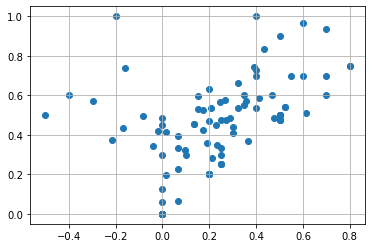

In [344]:
plt.scatter(data['Polarity'],data['Subjectivity'])
plt.grid()